# NOTEBOOK 3


# INTRODUCTION

Following the cleaning process, EDA and first model evaluation, there is need to do a hyperparameter grid search for the best parameters to use and the best models to fit the dataset with. This will be great for a better prediction of income for the test set which was not given.


In [1]:
# Import all the relevant packages
import numpy as np # for linear algebra
import pandas as pd # for data manipulation and analysis

import seaborn as sns # for data visualization and plots
import matplotlib.pyplot as plt
%matplotlib inline

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a model
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.inspection import permutation_importance

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline
from sklearn import set_config

# To try scaling the data in various ways
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

C:\Users\audre\anaconda3\envs\boosting\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## BASIC EDA
- Read in the csv to be used
- Because the test csv doesn't have any input values for income, I will split the train csv into a train and test set and use the best model and parameter to predict the income for the test csv data

In [2]:
train = pd.read_csv('cleaned_train.csv')
train

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z,income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,1,0,0,0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,26.7
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,1,28.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0705,0.4108,0.0104,0.0436,...,0,1,0,0,0,0,1,0,0,41.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0459,0.2184,0.0515,0.0362,...,0,0,0,0,0,1,0,0,0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,1,19.5
17009,1.0,1.0,0.0,1.0,1.0,1.0,0.0000,0.0307,0.0000,0.0921,...,0,0,0,1,0,0,1,0,0,20.7
17010,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,28.0
17011,0.0,0.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,1,0,22.4


In [3]:
train.index.name='row_id'
train

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z,income
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,1,0,0,0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,26.7
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,1,28.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0705,0.4108,0.0104,0.0436,...,0,1,0,0,0,0,1,0,0,41.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0459,0.2184,0.0515,0.0362,...,0,0,0,0,0,1,0,0,0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,1,19.5
17009,1.0,1.0,0.0,1.0,1.0,1.0,0.0000,0.0307,0.0000,0.0921,...,0,0,0,1,0,0,1,0,0,20.7
17010,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,28.0


In [4]:
# EDA for train data checking data shape, missing values and duplicates
print(f"Rows: {train.shape[0]}")
print(f"Columns: {train.shape[1]}")
print(f"Missing values: {train.isna().sum().sum()}")
print(f"Duplicated rows: {train.duplicated().sum()}")

Rows: 17013
Columns: 72
Missing values: 0
Duplicated rows: 0


**OBSERVATIONS:**
- The df contains 17,013 rows and 73 columns ready for modeling
- Go ahead and define the features and target variables

In [5]:
# Define the features(X) and target(y) variables for the train set

X = train.drop(columns='income')
y = train['income']

In [6]:
# Do a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## HYPERPARAMETER TUNING FOR DIFFERENT MODELS
### FITTING A DECISION TREE REGRESSOR MODEL

**Methodology:**
- Create a pipeline
- List the hyperparameters for tuning
- Insert hyperparameter into pipeline and do a Grid search for best model
- Fit the best model and check the model scores

In [7]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline

# Create placeholders for DT step
estimators = [
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
]

pipe = Pipeline(estimators, memory=cachedir)

In [8]:
# Visualize the pipeline
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmp2ag80xg9',
         steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [9]:
# Define the parameters for the DT grid search
param_grid = [{
        'scaler': [StandardScaler(), None],
        'model': [DecisionTreeRegressor()], 
        'model__max_depth' : [1,3,5,7,9],
        'model__min_samples_leaf' : [3,4,5,6,7],
        'model__min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4],
        'model__max_features' : ["auto","log2","sqrt",None],
        'model__max_leaf_nodes':[None,10,20,30,40]
    }
]

DTgrid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, verbose=5)

DTfittedgrid = DTgrid.fit(X_train, y_train)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


In [10]:
# Best estimator object
DTfittedgrid.best_estimator_

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmp2ag80xg9',
         steps=[('scaler', None),
                ('model',
                 DecisionTreeRegressor(max_depth=3, max_features='auto',
                                       max_leaf_nodes=20, min_samples_leaf=4,
                                       min_weight_fraction_leaf=0.1))])

In [11]:
# Best hyperparameters for DT
DTfittedgrid.best_params_

{'model': DecisionTreeRegressor(max_depth=3, max_features='auto', max_leaf_nodes=20,
                       min_samples_leaf=4, min_weight_fraction_leaf=0.1),
 'model__max_depth': 3,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 4,
 'model__min_weight_fraction_leaf': 0.1,
 'scaler': None}

In [12]:
# Best score for Decision Tree
DTfittedgrid.best_score_

-5.772871580908385

In [54]:
tunedDT =  DecisionTreeRegressor(max_depth=3, max_features='auto', max_leaf_nodes=20,
                       min_samples_leaf=4, min_weight_fraction_leaf=0.1)

In [55]:
# fitting the DT model


tunedDT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1)

In [56]:
# Model Predictions for train and validation set
tuned_DTpred = tunedDT.predict(X_test)
DT_train_pred = tunedDT.predict(X_train)

In [68]:
# List the model scores 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_DTpred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_DTpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_DTpred)))
print('R2 for train set:', r2_score(y_train, DT_train_pred))
print('R2 for test set:', r2_score(y_test, tuned_DTpred))

MAE: 5.4970397171940375
MSE: 67.98931528120688
RMSE: 8.245563369546492
R2 for train set: 0.41394226822032687
R2 for test set: 0.430037097524813


**OBSERVATIONS:**
- The R2 score for the train set is lower than the validation set, is the model overfitting or underfitting?
- We do need a model with a low RMSE, the lower the better for a better prediction
- We will go ahead and save the model best estimator to a pickle file for future use
- We will also go ahead and do other model fitting on the data set

In [58]:
# use joblib to pickle the best model for future use
joblib.dump(DTfittedgrid.best_estimator_, 'pickled_best_DT.pkl')

['pickled_best_DT.pkl']

## FITTING A LINEAR REGRESSION(RIDGE) MODEL
**Methodology:**
- Create a pipeline
- List the hyperparameters for tuning
- Insert hyperparameters into pipeline and do a Grid search for best model
- Fit the best model and check the model scores

In [18]:
# Create placeholders for Ridge step
estimators = [
    ('scaler', StandardScaler()),
    ('model', Ridge())
]

pipe = Pipeline(estimators, memory=cachedir)

In [19]:
# Visualize the pipeline
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmp2ag80xg9',
         steps=[('scaler', StandardScaler()), ('model', Ridge())])

In [20]:
# Define the parameters for the Ridge grid search
param_grid = [

        {'scaler': [None, StandardScaler(), MinMaxScaler(), None],
         'model': [Ridge()],  
         'model__solver': ['svd', 'cholesky', 'lsqr', 'sag'],
         'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
        }
]

Ridge_grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, verbose=5)

Ridge_fittedgrid = Ridge_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [21]:
# Best estimator object for Ridge model
Ridge_fittedgrid.best_estimator_

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmp2ag80xg9',
         steps=[('scaler', StandardScaler()),
                ('model', Ridge(alpha=1000, solver='svd'))])

In [22]:
# Best hyperparameters for Ridge model
Ridge_fittedgrid.best_params_

{'model': Ridge(alpha=1000, solver='svd'),
 'model__alpha': 1000,
 'model__solver': 'svd',
 'scaler': StandardScaler()}

In [23]:
# Best score
Ridge_fittedgrid.best_score_

-4.610674503661291

In [24]:
# Scale the data
# Instantiate the scaler
ss = StandardScaler()

# Fit (ON THE TRAINING DATA)
ss.fit(X_train)

# Transform (both the train and validation data)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [25]:
# Using the best model parameter
tuned_Ridge = Ridge(alpha=1000, solver='svd')

In [26]:
# fitting the Ridge model


tuned_Ridge.fit(X_train_ss,y_train)

Ridge(alpha=1000, solver='svd')

In [27]:
# Model Predictions for train and validation set
Ridge_train_pred = tuned_Ridge.predict(X_train_ss)
tuned_Ridge_pred = tuned_Ridge.predict(X_test_ss)

In [69]:
# List the model scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_Ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_Ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_Ridge_pred)))
print('R2 for train set:', r2_score(y_train, Ridge_train_pred))
print('R2 for test set:', r2_score(y_test, tuned_Ridge_pred))

MAE: 4.63056750154309
MSE: 46.225258427512884
RMSE: 6.798915974441285
R2 for train set: 0.6419940090588205
R2 for test set: 0.6124878982522508


**OBSERVATIONS:**
- The R2 score for the train set is slightly higher than the validation set, which is a good sign
- We do need a model with a low RMSE, and the Ridge model has a lower RMSE(Root Mean Squared Error) than the Decision tree regression model which is a good sign
- the Ridge model seems to do better than the Decision tree regression model
- We will go ahead and save the model best estimator to a pickle file for future use
- We will also go ahead and do other model fitting on the data set

In [29]:
# use joblib to pickle the best model for future use
joblib.dump(Ridge_fittedgrid.best_estimator_, 'pickled_best_Ridge.pkl')

['pickled_best_Ridge.pkl']

## FITTING AN eXTREME GRADIENT BOOSTING( XGBOOST) REGRESSOR MODEL
**Methodology:**
- Create a pipeline
- List the hyperparameters for tuning
- Insert hyperparameters into pipeline and do a Grid search for best model
- Fit the best model and check the model scores

In [30]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline

# Create placeholders for XGB step
estimators = [
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
]

pipe = Pipeline(estimators, memory=cachedir)

In [31]:
# Visualize the pipeline
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmpj34ze8uw',
         steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [32]:
# Define the parameters for the XGB grid search
param_grid = [
    { 
        'scaler': [StandardScaler(), MinMaxScaler(), None],
        'model': [XGBRegressor()], 
        'model__max_depth': [5,7,10],
        'model__learning_rate': [0.01, 0.05, 0.1],  
        'model__n_estimators': [100, 500, 1000],
        'model__colsample_bytree': [0.3, 0.7]
    }
]

XGB_grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, verbose=5)

XGB_fittedgrid = XGB_grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [33]:
# Best estimator object for XGB model
XGB_fittedgrid.best_estimator_

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmpj34ze8uw',
         steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [34]:
# Best hyperparameters for XGB model
XGB_fittedgrid.best_params_

{'model': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None),
 'model__colsample_bytree': 0.7,
 'model__learning_rate': 0.05,
 'model__max_depth': 10,
 'model__n_estimators': 1000,
 'scaler': MinMaxScaler()}

In [35]:
# Best score
XGB_fittedgrid.best_score_

-2.489497459392001

In [59]:
# Scale the data
# Instantiate the scaler
mm = MinMaxScaler()

# Fit (ON THE TRAINING DATA)
mm.fit(X_train)

# Transform (both the train and validation data)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

In [60]:
# Using the best model parameter
tuned_XGB =  XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=1000)

In [61]:
# fitting the XGBoost model


tuned_XGB.fit(X_train_mm,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# Model Predictions for train and validation set
XGB_train_pred = tuned_XGB.predict(X_train_mm)
tuned_XGB_pred = tuned_XGB.predict(X_test_mm)

In [70]:
# List the model scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_XGB_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_XGB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_XGB_pred)))
print('R2 for train set:', r2_score(y_train, XGB_train_pred))
print('R2 for test set:', r2_score(y_test, tuned_XGB_pred))

MAE: 2.3357390455032423
MSE: 14.512759739658282
RMSE: 3.809561620404411
R2 for train set: 0.9995554550218604
R2 for test set: 0.8783377265982397


**OBSERVATIONS:**
- The R2 score for the validation set is much better than the other models
- We do need a model with a low RMSE, and the XGBRegressor model has the lowest RMSE(Root Mean Squared Error) of 3.81 of the three models
- This model seems to do a lot better
- We will go ahead and save the model best estimator to a pickle file for future use

In [64]:
# use joblib to pickle the best model for future use
joblib.dump(XGB_fittedgrid.best_estimator_, 'pickled_best_XGB.pkl')

['pickled_best_XGB.pkl']

## FITTING A RANDOM FOREST REGRESSOR MODEL
**Methodology:**
- Create a pipeline
- List the hyperparameters for tuning
- Insert hyperparameters into pipeline and do a Grid search for best model
- Fit the best model and check the model scores

In [41]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline

# Create placeholders for Random Forest step
estimators = [
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
]

pipe = Pipeline(estimators, memory=cachedir)

In [42]:
# Visualize the pipeline
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmpifk72011',
         steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [43]:
# Define the parameters for the Random Forest grid search
param_grid = [
    { 
        'scaler': [StandardScaler(), None],
        'model': [RandomForestRegressor(random_state=0)], 
        'model__max_depth': [3,6,7,10],
        'model__max_features': ["auto", "log2", "sqrt"],
        'model__min_samples_leaf': [1, 2, 4],
        'model__min_samples_split': [2, 5, 10],
        'model__bootstrap': [True, False], 
        'model__n_estimators': [10, 50, 100, 200]
    }
]

RF_grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, verbose=5)

RF_fittedgrid = RF_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


In [44]:
# Best estimator object for RF model
RF_fittedgrid.best_estimator_

Pipeline(memory='C:\\Users\\audre\\AppData\\Local\\Temp\\tmpifk72011',
         steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       n_estimators=200, random_state=0))])

In [45]:
# Best hyperparameters for RF model
RF_fittedgrid.best_params_

{'model': RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=0),
 'model__bootstrap': True,
 'model__max_depth': 10,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 2,
 'model__n_estimators': 200,
 'scaler': StandardScaler()}

In [46]:
# Best score
RF_fittedgrid.best_score_

-3.3698683433514076

In [47]:
# Using the best model parameter
tuned_RF = RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=0)

In [65]:
# fitting the Random Forest model


tuned_RF.fit(X_train_ss,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200,
                      random_state=0)

In [66]:
# Model Predictions for train and validation set
RF_train_pred = tuned_RF.predict(X_train_ss)
tuned_RF_pred = tuned_RF.predict(X_test_ss)

In [71]:
# List the model scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_RF_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_RF_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_RF_pred)))
print('R2 for train set:', r2_score(y_train, RF_train_pred))
print('R2 for test set:', r2_score(y_test, tuned_RF_pred))

MAE: 3.2359750275503822
MSE: 23.07869155376814
RMSE: 4.804028679532226
R2 for train set: 0.8853996069156322
R2 for test set: 0.806528452758941


In [51]:
# use joblib to pickle the best model for future use
joblib.dump(RF_fittedgrid.best_estimator_, 'pickled_best_RF.pkl')

['pickled_best_RF.pkl']

In [72]:
Results = {'models' : ['Decision Tree', 'Ridge', 'XGboostRegressor', 'RandomForestRegressor'],
           'RMSE' : [8.25, 6.79, 3.81, 4.80],
           'R2' : [0.43, 0.61, 0.88, 0.81]}
# Create DataFrame  
Results_df = pd.DataFrame(Results)  
Results_df

,models,RMSE,R2
0,Decision Tree,8.25,0.43
1,Ridge,6.79,0.61
2,XGboostRegressor,3.81,0.88
3,RandomForestRegressor,4.80,0.81


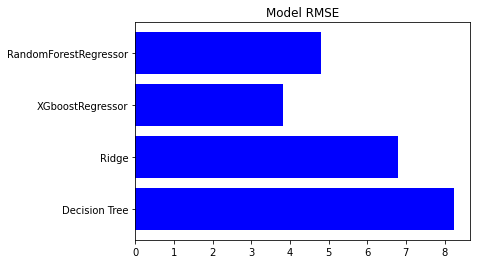

In [73]:
plt.barh(Results_df["models"], Results_df["RMSE"], color = 'blue')
plt.title("Model RMSE")
plt.show()

**OBSERVATIONS AND NEXT STEPS**
- The Random Forest Regressor model gave us a RMSE of 4.8 which is not as low as the XGBoost but better than the ridge and Decision tree models
- The R2 score of this model is also a lot better as well
- we will go ahead and do a feature importance evaluation using Shapley values to interpret the XGBoost model in the next notebook as well as predict the target variable for the test set